In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#### Load and understand the data

In [3]:
df = pd.read_csv('heart.csv')

In [19]:
print('Data Columns: ', df.columns)
features = df.columns[:-2]
X = df[features]
Y = df['target']
print(f"X.shape, {X.shape}, Y.shape, {Y.shape}")

Data Columns:  Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
X.shape, (1025, 12), Y.shape, (1025,)


#### Train/dev split dataset

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

#### Fitting the model

In [22]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

### Feature importance based on mean decrease in impurity 
Ref: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca'],
      dtype='object')
Index(['cp', 'ca', 'thalach', 'oldpeak', 'age', 'chol', 'exang', 'trestbps',
       'sex', 'slope', 'restecg', 'fbs'],
      dtype='object')


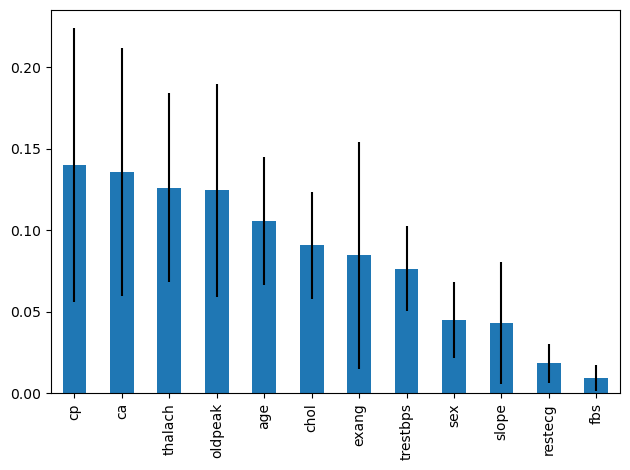

In [42]:
importances = forest.feature_importances_

stdev = pd.Series(np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0), index=features)
forest_importances = pd.Series(importances, index=features)
print(forest_importances.index)
forest_importances.sort_values(inplace=True, ascending=False)
print(forest_importances.index)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=stdev[forest_importances.index], ax=ax)
fig.tight_layout()

### Feature importance based on feature permutation

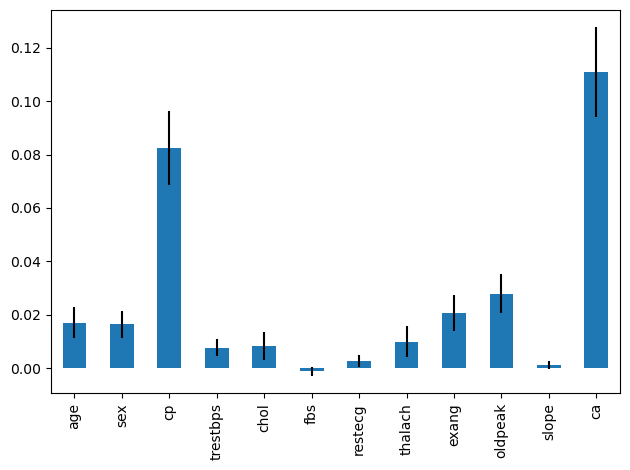

In [38]:
from sklearn.inspection import permutation_importance

result = permutation_importance(forest, X_test, y_test, n_repeats=21, n_jobs=3)
forest_importances_permut = pd.Series(result.importances_mean, index=features)


fig, ax = plt.subplots()
forest_importances_permut.plot.bar(yerr=result.importances_std, ax=ax)
fig.tight_layout()